## 逼近法（近似）
    * 回归和插值是金融学中重要的工具。

## 凸优化
    * 如期权定价模型

## 积分
    * 资产估值的往往归结为积分的计算。

## 符号数学
    * SymPy ， 数学符号。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return np.sin(x) + 0.5*x

Text(0, 0.5, 'f(x)')

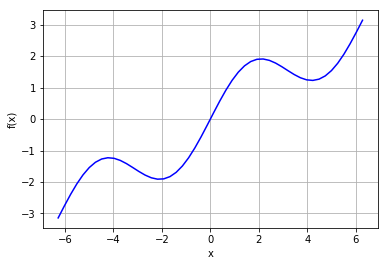

In [21]:
# -2π 到 2π
x=np.linspace(-2*np.pi, 2*np.pi, 50)
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

# 回归
![FSJj9x.png](https://s1.ax1x.com/2018/11/18/FSJj9x.png)

In [12]:
"""
x:
y:
deg:多项式拟合
full:如果为真，返回额为的诊断信息
w:应用到y坐标的权重
cov: 如果为真，返回协方差矩阵
"""
reg = np.polyfit(x, f(x), deg=1)
ry = np.polyval(reg, x)

Text(0, 0.5, 'y')

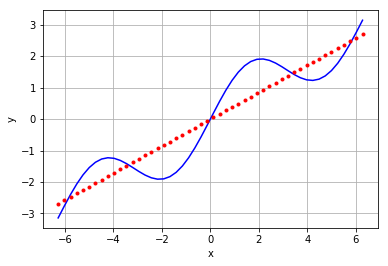

In [14]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

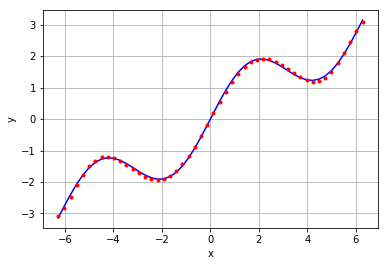

In [17]:
# 7次多项式
reg = np.polyfit(x, f(x), deg=7)
ry = np.polyval(reg, x)
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

In [18]:
np.allclose(f(x), ry)

False

In [29]:
np.sum((f(x)-ry)**2)/len(x)

0.0017769134759517671

# 单纯的基函数

In [33]:

matrix = np.zeros((3+1, len(x)))
matrix[3, :] = x**3
matrix[2, :] = x**2
matrix[1, :] = x
matrix[0, :] = 1

In [31]:
reg = np.linalg.lstsq(matrix.T, f(x))[0]
reg

/Users/cuijl/.pyenv/versions/3.6.0/envs/rqalpha_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([ 1.16778801e-14,  5.62777448e-01, -8.88178420e-16, -5.43553615e-03])

Text(0, 0.5, 'f(x)')

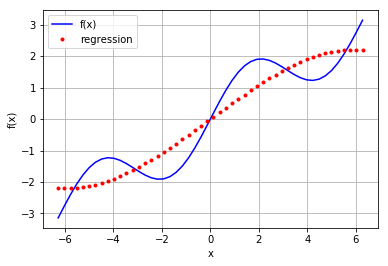

In [32]:
ry = np.dot(reg, matrix)
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [34]:
matrix[3,:] = np.sin(x)
reg = np.linalg.lstsq(matrix.T, f(x))[0]

/Users/cuijl/.pyenv/versions/3.6.0/envs/rqalpha_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


Text(0, 0.5, 'f(x)')

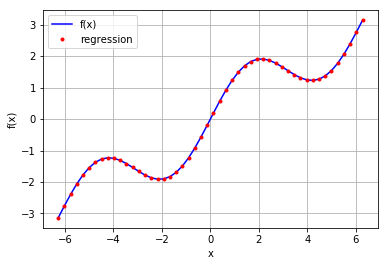

In [35]:
ry = np.dot(reg, matrix)
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [36]:
np.allclose(f(x), ry)

True

In [37]:
np.sum((f(x)-ry)**2)/len(x)

9.145856119906106e-31

# 有噪声的数据

In [41]:

xn = np.linspace(-2*np.pi, 2*np.pi, 50)
xn = xn + 0.15*np.random.standard_normal(len(xn))
yn = f(xn) + 0.25*np.random.standard_normal(len(xn))

In [42]:
reg = np.polyfit(xn, yn ,7)
ry = np.polyval(reg, xn)

Text(0, 0.5, 'f(x)')

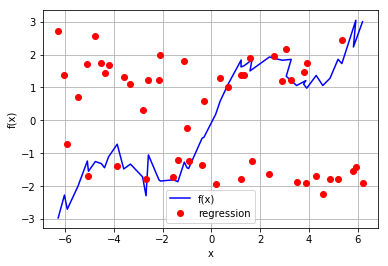

In [52]:
plt.plot(xn, yn, 'b', label='f(x)')
plt.plot(xn, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

# 未排序数据
> 回归不关心观察点的顺序

In [53]:

xu = np.random.rand(50)*4*np.pi - 2*np.pi

In [45]:
yu = f(xu)

In [46]:
print (xu[:10].round(2))
print (yu[:10].round(2))

[ 6.05  3.61 -0.51  0.5   2.95 -2.95  5.88  1.51  4.89  1.4 ]
[ 2.8   1.35 -0.74  0.73  1.67 -1.66  2.55  1.75  1.46  1.69]


In [47]:
reg = np.polyfit(xu, yu ,7)
ry = np.polyval(reg, xu)

Text(0, 0.5, 'f(x)')

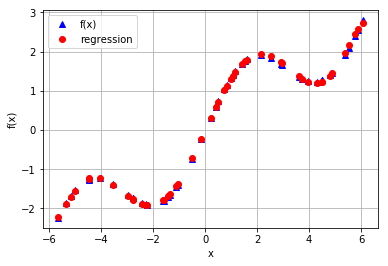

In [51]:
plt.plot(xu, yu, 'b^', label='f(x)')
plt.plot(xu, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

# 多维
> 最小二乘回归方法的另一个便利特性是不需要太多的修改就可以用于多维的情况。

In [28]:
def fm(x,y):
    return np.sin(x) + 0.25*x + np.sqrt(y) + 0.05 * y**2

In [29]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x,y)
Z = fm(X,Y)
x= X.flatten()
y= Y.flatten()

In [30]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

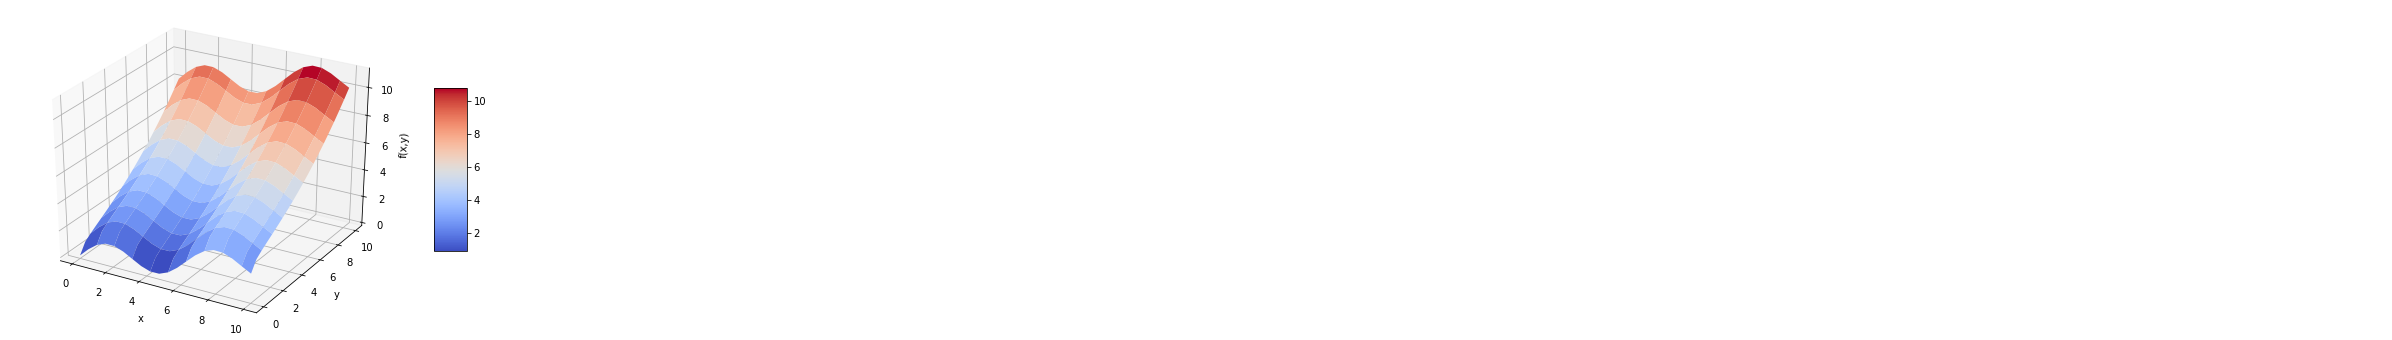

In [31]:
fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(X, Y, Z, 
                       rstride=2, cstride=2, 
                       cmap=mpl.cm.coolwarm,
                      linewidth=0.5,
                      antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [7]:
matrix = np.zeros((len(x), 6+1))
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y**2
matrix[:, 3] = x**2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

In [1]:
# statsmodels 库提供相当通用的有益的函数OLS
import statsmodels.api as sm

In [9]:
model = sm.OLS(fm(x,y), matrix).fit()
model.rsquared

1.0

In [10]:
a = model.params
a

array([-1.55431223e-15,  2.50000000e-01,  7.68002955e-16, -1.19695920e-16,
        5.00000000e-02,  1.00000000e+00,  1.00000000e+00])

In [15]:
# 返回给定最优回归参数和自变量数据点的回归函数值
def reg_func(a, p):
    x,y = p
    f6 = a[6] * np.sqrt(y)
    f5 = a[5] * np.sin(x)
    f4 = a[4] * y ** 2
    f3 = a[3] * x ** 2
    f2 = a[2] * y
    f1 = a[1] * x
    f0 = a[0] * 1
    return(f6 + f5 + f4 + f3 + f2 + f1 + f0)

In [23]:
RZ = reg_func(a, (X,Y))

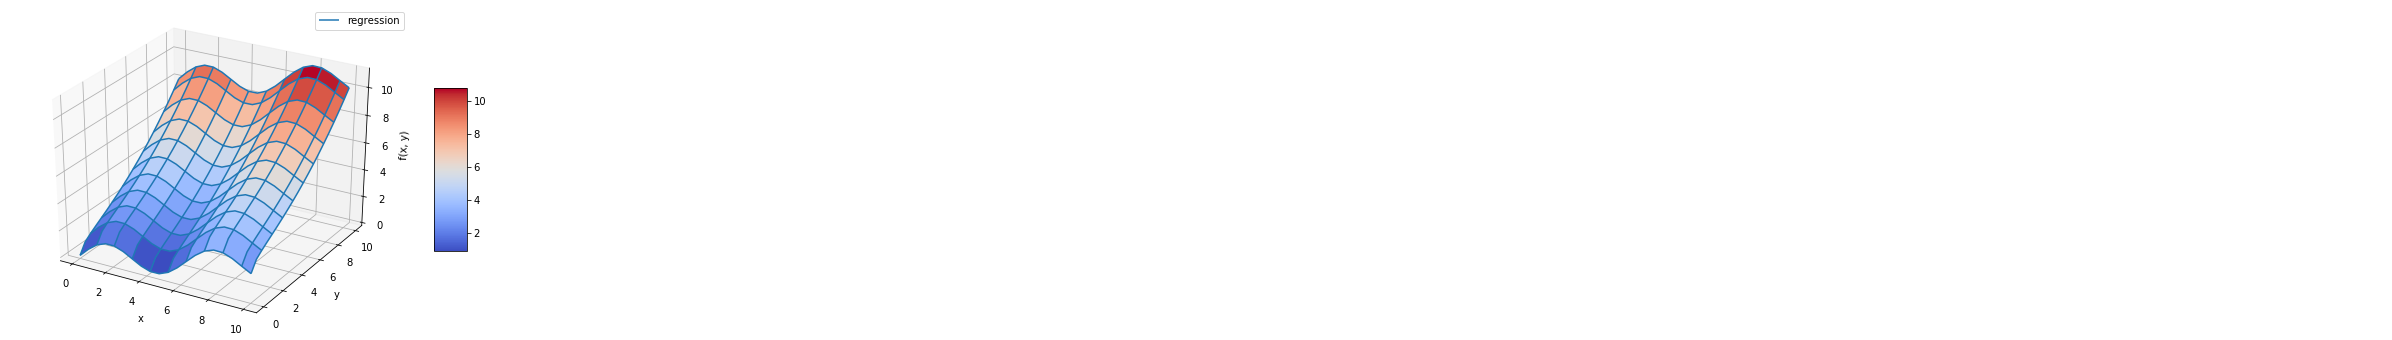

In [32]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
            cmap=mpl.cm.coolwarm, linewidth=0.5,
            antialiased=True)
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2,
                          label='regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)
# tag: sin_plot_3d_2
# title: Higher dimension regression
# size: 60

> 回归
最小二乘回归方法，包括简单的函数逼近，基于有噪声，或者未排序数据的逼近。

# 插值

In [6]:
import scipy.interpolate as spi

In [3]:
x = np.linspace(-2*np.pi, 2*np.pi, 25)
x

array([-6.28318531, -5.75958653, -5.23598776, -4.71238898, -4.1887902 ,
       -3.66519143, -3.14159265, -2.61799388, -2.0943951 , -1.57079633,
       -1.04719755, -0.52359878,  0.        ,  0.52359878,  1.04719755,
        1.57079633,  2.0943951 ,  2.61799388,  3.14159265,  3.66519143,
        4.1887902 ,  4.71238898,  5.23598776,  5.75958653,  6.28318531])

In [4]:
def f(x):
    return np.sin(x) + 0.5*x

In [8]:
"""
x: x坐标
y: y坐标
k: 样条拟合顺序(1<=k<=5)
"""
ipo = spi.splrep(x,f(x), k=1)
iy = spi.splev(x, ipo)

Text(0, 0.5, 'f(x)')

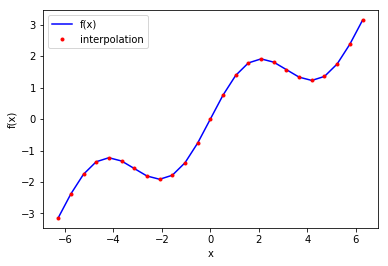

In [10]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, iy, 'r.', label='interpolation')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('f(x)')

In [11]:
# 数值方式加以确认
np.allclose(f(x),iy)

True

In [14]:
# 选择小区间
xd = np.linspace(1.0, 3.0, 50)
iyd = spi.splev(xd, ipo)

array([1.        , 1.04081633, 1.08163265, 1.12244898, 1.16326531,
       1.20408163, 1.24489796, 1.28571429, 1.32653061, 1.36734694,
       1.40816327, 1.44897959, 1.48979592, 1.53061224, 1.57142857,
       1.6122449 , 1.65306122, 1.69387755, 1.73469388, 1.7755102 ,
       1.81632653, 1.85714286, 1.89795918, 1.93877551, 1.97959184,
       2.02040816, 2.06122449, 2.10204082, 2.14285714, 2.18367347,
       2.2244898 , 2.26530612, 2.30612245, 2.34693878, 2.3877551 ,
       2.42857143, 2.46938776, 2.51020408, 2.55102041, 2.59183673,
       2.63265306, 2.67346939, 2.71428571, 2.75510204, 2.79591837,
       2.83673469, 2.87755102, 2.91836735, 2.95918367, 3.        ])

Text(0, 0.5, 'f(x)')

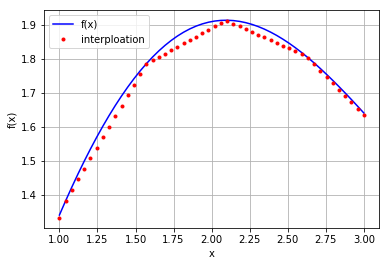

In [13]:
plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interploation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [15]:
ipo = spi.splrep(x, f(x), k=3)
iyd = spi.splev(xd, ipo)

Text(0, 0.5, 'f(x)')

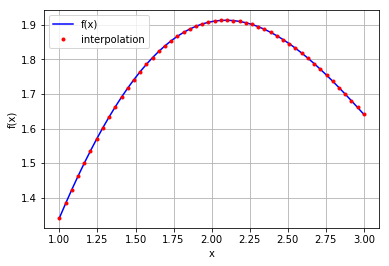

In [16]:
plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [17]:
# 数值校验
np.allclose(f(xd), iyd)

False

In [18]:
np.sum((f(xd) - iyd) **2)/len(xd)

1.1349319851436892e-08

> 应用样条插值的情况，需要
* 有序
* 无噪声
* 限于低维度

# 凸优化

应用： 根据市场数据校准期权定价模型

In [36]:
def fm(p):
    x, y = p
    return (np.sin(x) + 0.05 * x ** 2
          + np.sin(y) + 0.05 * y ** 2)

In [38]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X,Y = np.meshgrid(x,y)
Z = fm((X,Y))

In [39]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

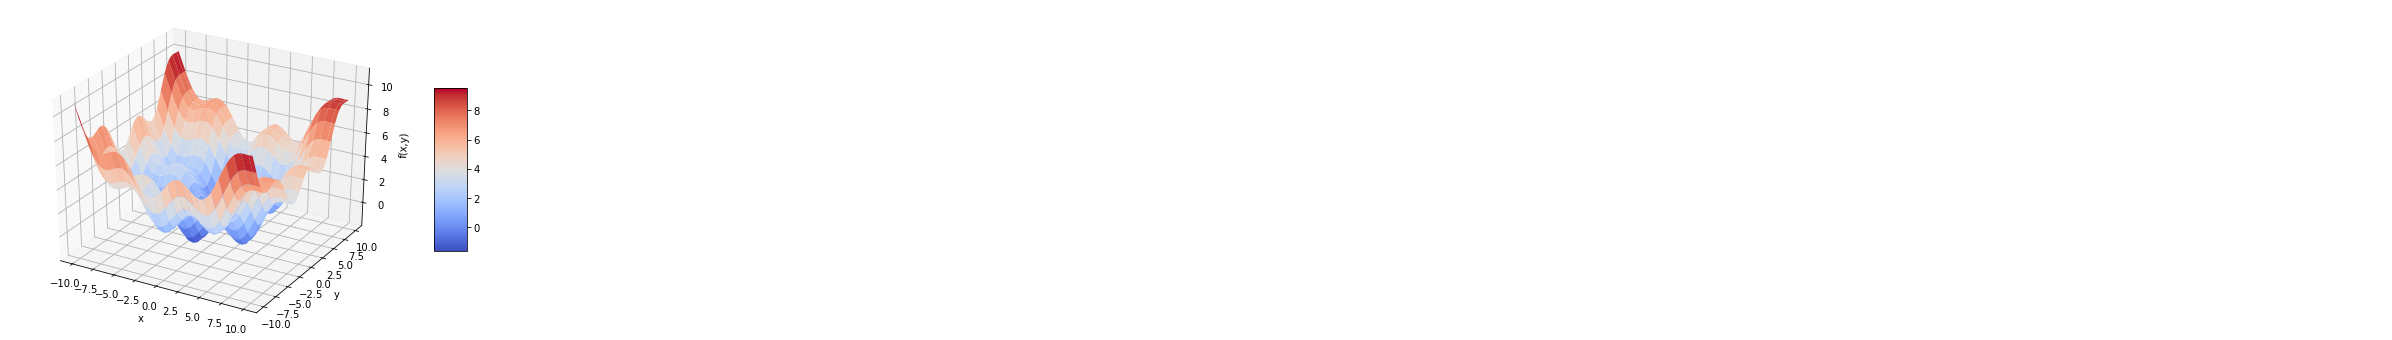

In [40]:
fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,Z,
                       rstride=2, cstride=2, 
                      cmap=mpl.cm.coolwarm,
                      lw=0.5, antialiased = True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink=0.5, aspect=5)


## 全局优化

In [41]:
# 全局最小化方法和局部最小化方法 , brute fmin
import scipy.optimize as spo

In [46]:
"""
def fm(p):
    x, y = p
    return (np.sin(x) + 0.05 * x ** 2
          + np.sin(y) + 0.05 * y ** 2)
"""
def fo(p):
    x, y = p
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print('%8.4f %8.4f %8.4f' % (x, y, z))
    return z

In [43]:
output = True
spo.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)

-10.0000 -10.0000  11.0880
-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120


array([0., 0.])

In [44]:
output = False
opt1 = spo.brute(fo, ((-10,10.1, 0.1), (-10,10.1,0.1)), finish=None)
opt1

array([-1.4, -1.4])

In [47]:
fo(opt1)

-1.7748994599769203

## 局部优化

In [48]:
output = True
opt2 = spo.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)
opt2

 -1.4000  -1.4000  -1.7749
 -1.4700  -1.4000  -1.7743
 -1.4000  -1.4700  -1.7743
 -1.3300  -1.4700  -1.7696
 -1.4350  -1.4175  -1.7756
 -1.4350  -1.3475  -1.7722
 -1.4088  -1.4394  -1.7755
 -1.4438  -1.4569  -1.7751
 -1.4328  -1.4427  -1.7756
 -1.4591  -1.4208  -1.7752
 -1.4213  -1.4347  -1.7757
 -1.4235  -1.4096  -1.7755
 -1.4305  -1.4344  -1.7757
 -1.4168  -1.4516  -1.7753
 -1.4305  -1.4260  -1.7757
 -1.4396  -1.4257  -1.7756
 -1.4259  -1.4325  -1.7757
 -1.4259  -1.4241  -1.7757
 -1.4304  -1.4177  -1.7757
 -1.4270  -1.4288  -1.7757


array([-1.42702972, -1.42876755])

In [49]:
fm(opt2)

-1.7757246992239009

## 有约束优化

In [50]:
from math import  sqrt

In [60]:
# function to be minimized
from math import sqrt
def Eu(p):
    s, b = p
    return -(0.5 * sqrt(s * 15 + b * 5) + 0.5 * sqrt(s * 5 + b * 12))

# constraints
cons = ({
    'type': 'ineq', 
    'fun': lambda p:  100 - p[0] * 10 - p[1] * 10
})
  # budget constraint
bnds = ((0, 1000), (0, 1000))  # uppper bounds large enough

In [62]:
#result = spo.minimize(Eu, [5,5], method='SLSQP', 
#                      bounds=bnds, constraints=cons)
result = spo.minimize(Eu, [5, 5], method='SLSQP',
                       bounds=bnds, constraints=cons)
result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([8.02547122, 1.97452878])

In [63]:
result['x']

array([8.02547122, 1.97452878])

In [65]:
-result['fun']

9.700883611487832

In [66]:
np.dot(result['x'], [10, 10])

99.99999999999999

# 积分
> `scipy.integrat`子库提供了数值积分

In [68]:
import scipy.integrate as sci

In [69]:
def f(x):
    return np.sin(x) + 0.5 *x

In [70]:
a = 0.5
b = 9.5
x = np.linspace(0, 10)
y = f(x)

In [71]:
from matplotlib.patches import  Polygon

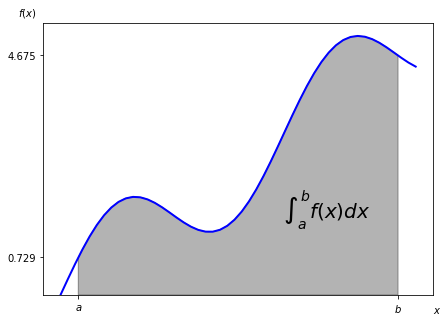

In [78]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(bottom=0)

# area under the function
# between lower and upper limit
Ix = np.linspace(a, b)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)

# labels
plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)])

## 数值积分

## 通过模拟求取积分

In [81]:
for i in range(1,20):
    np.random.seed(1000)
    x = np.random.random(i*10)*(b-a) + a
    print (np.sum(f(x)) / len(x) * (b-a))

24.804762279331463
26.522918898332378
26.265547519223976
26.02770339943824
24.99954181440844
23.881810141621663
23.527912274843253
23.507857658961207
23.67236746066989
23.679410416062886
24.424401707879305
24.239005346819056
24.115396924962802
24.424191987566726
23.924933080533783
24.19484212027875
24.117348378249833
24.100690929662274
23.76905109847816


# 符号计算

In [2]:
# 导入符号计算的SymPy库
import sympy as sy

## 基本知识

In [4]:
x = sy.Symbol('x')
y = sy.Symbol('y')
type(x)

sympy.core.symbol.Symbol

In [5]:
sy.sqrt(x)

sqrt(x)

In [6]:
3 + sy.sqrt(x) - 4**2

sqrt(x) - 13

In [8]:
f = x**2 + 3 + 0.5*x**2 + 3/2
sy.simplify(f)

1.5*x**2 + 4.5

> SymPy 为数学表达式提供了3个基本的渲染器

* 基于LaTex的渲染器
* 基于unicode 的渲染器
* 基于ASCII的渲染器

In [9]:
sy.init_printing(pretty_print=False, use_unicode=False)
print(sy.pretty(f))

     2      
1.5*x  + 4.5


In [11]:
print(sy.pretty(sy.sqrt(x) + 0.5))

  ___      
\/ x  + 0.5


In [13]:
pi_str = str(sy.N(sy.pi, 400000))
pi_str[:40]

'3.14159265358979323846264338327950288419'

In [14]:
pi_str.find('111272')

366713

### 方程式

In [15]:
# 解方程 x**2 - 1= 0
sy.solve(x**2 -1)

[-1, 1]

In [17]:
# x**2 -1 = 3
sy.solve(x**2 -1 -3)

[-2, 2]

In [18]:
# x**3 + 0.5 * x**2 -1 = 0
sy.solve(x**3 + 0.5*x**2 -1)

[0.858094329496553, -0.679047164748276 - 0.839206763026694*I, -0.679047164748276 + 0.839206763026694*I]

In [20]:
# 复数的支持, x**2 + y**2 =0
sy.solve(x**2 + y**3)

[{x: -sqrt(-y**3)}, {x: sqrt(-y**3)}]

## 积分

In [21]:
a,b = sy.symbols('a b')

In [23]:
print(sy.pretty(sy.Integral(sy.sin(x) + 0.5*x, (x,a,b))))

  b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      


In [24]:
int_func = sy.integrate(sy.sin(x) + 0.5*x, x)
print(sy.pretty(int_func))

      2         
0.25*x  - cos(x)
